<a href="https://colab.research.google.com/github/hosngholami/RecommenderSystem/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opendatasets
!pip install geopy
!pip install folium
!pip install -U pymoo
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.9 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=25c91ba88c2ec127abbfd3ed23a114c0d547bbfa3ab4f3bee316871e32b9bfe8
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
np.set_printoptions(suppress=True)
pd.set_option("display.max_columns", 1000)
pd.set_option('display.max_rows', 1000)
np.set_printoptions(threshold=np.inf)

In [5]:
import random
import matplotlib.pyplot as plt
locations = pd.read_csv('/content/drive/MyDrive/Shiraz/locations.csv')
locations["Id"] = [i for i in range(0, len(locations))]
locations["Stars"] = 0
locations["Price"] = 0
# locations["Price"] = [random.randint(10, 200) for i in range(len(locations))]

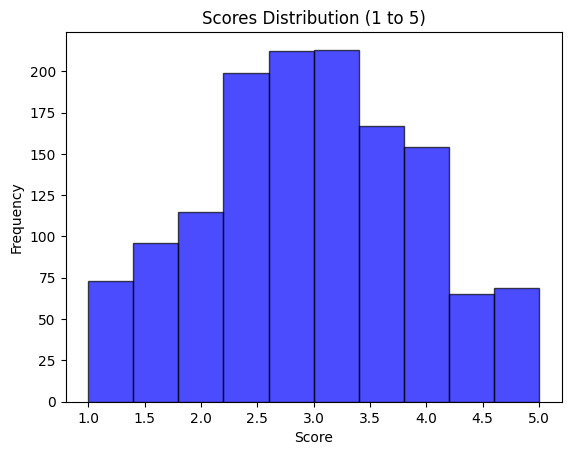

In [6]:
mean_score = 3  # میانگین امتیاز (در وسط بازه 1 تا 5)
std_dev = 1     # انحراف معیار امتیاز

# تعداد آیتم‌ها
num_items = len(locations)

# تولید امتیازات خام با توزیع نرمال
raw_scores = np.random.normal(mean_score, std_dev, num_items)
scores = np.clip(raw_scores, 1, 5)
data = pd.DataFrame({'Item': [f'Item_{i+1}' for i in range(num_items)], 'Score': scores})

# مرتب‌سازی بر اساس امتیاز و اختصاص رتبه
data = data.sort_values(by='Score', ascending=False).reset_index(drop=True)
data['Rank'] = data.index + 1

# رسم هیستوگرام امتیازات
plt.hist(scores, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.title('Scores Distribution (1 to 5)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

locations["Stars"] = scores

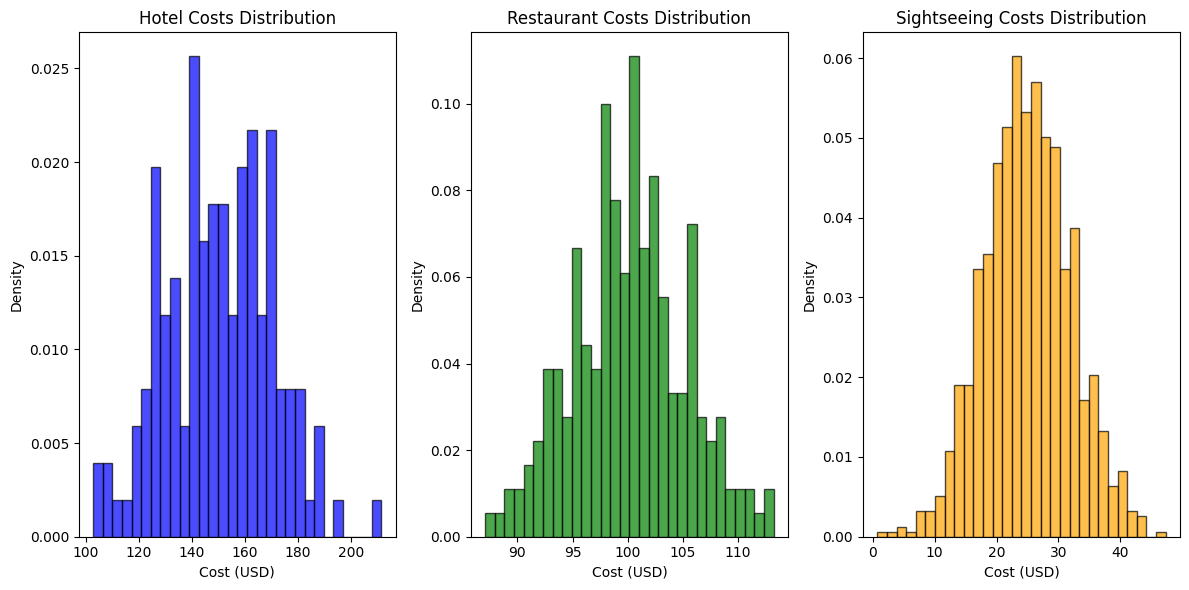

In [7]:
import numpy as np


# تعداد مکان‌ها
num_hotels = len(locations[locations["type"] == "hotel"])         # تعداد هتل‌ها
num_restaurants = len(locations[locations["type"] == "restaurant"])    # تعداد رستوران‌ها
num_sightseeing = len(locations[~locations["type"].isin(['hotel', 'restaurant'])])    # تعداد مکان‌های دیدنی

# پارامترهای توزیع نرمال برای هزینه‌های واحد
# هزینه هتل
mean_hotel = 150  # میانگین هزینه هر هتل (دلار)
std_hotel = 20    # انحراف معیار هزینه هر هتل

# هزینه رستوران
mean_restaurant = 100  # میانگین هزینه هر رستوران (دلار)
std_restaurant = 5    # انحراف معیار هزینه هر رستوران

# هزینه مکان‌های دیدنی
mean_sightseeing = 25  # میانگین هزینه هر مکان دیدنی (دلار)
std_sightseeing = 7     # انحراف معیار هزینه هر مکان دیدنی

# تولید هزینه‌ها برای هر بخش
hotel_costs = np.random.normal(mean_hotel, std_hotel, num_hotels)
restaurant_costs = np.random.normal(mean_restaurant, std_restaurant, num_restaurants)
sightseeing_costs = np.random.normal(mean_sightseeing, std_sightseeing, num_sightseeing)

# رسم نمودار توزیع نرمال برای هر بخش
plt.figure(figsize=(12, 6))

# نمودار هتل‌ها
plt.subplot(1, 3, 1)
plt.hist(hotel_costs, bins=30, color='blue', alpha=0.7, edgecolor='black', density=True)
plt.title('Hotel Costs Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Density')

# نمودار رستوران‌ها
plt.subplot(1, 3, 2)
plt.hist(restaurant_costs, bins=30, color='green', alpha=0.7, edgecolor='black', density=True)
plt.title('Restaurant Costs Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Density')

# نمودار مکان‌های دیدنی
plt.subplot(1, 3, 3)
plt.hist(sightseeing_costs, bins=30, color='orange', alpha=0.7, edgecolor='black', density=True)
plt.title('Sightseeing Costs Distribution')
plt.xlabel('Cost (USD)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



indexHotel = locations[locations["type"] == "hotel"].index

for i in indexHotel:
   locations.loc[i, "Price"] = int(hotel_costs[i])

indexRestaurant = locations[locations["type"] == "restaurant"].index

c = 0
for i in indexRestaurant:
   locations.loc[i, "Price"] = restaurant_costs[c]
   c += 1


c = 0
indexSightseeing = locations[~locations["type"].isin(['hotel', 'restaurant'])].index
for i in indexSightseeing:
   locations.loc[i, "Price"] = sightseeing_costs[c]
   c +=1



In [ ]:
set(locations["type"])

{'caffe',
 'historic',
 'hotel',
 'museum',
 'park',
 'placeofworship',
 'restaurant',
 'swimmingpool'}

In [8]:
def getLocation():
   location = locations[locations["type"] != "hotel"].sample(n=1)
   return location["Id"].values[0]

In [9]:
def getLocationById(id):
   location = locations[locations["Id"] == id]
   return location


In [10]:
class GeneticAlgorithmConfig():
  totalLocationSize = 1
  hotelSize = 1
  numberLocationSize = len(locations[locations["type"] != "hotel"])
  totalRouteSize = 30
  timePlaceMappingSize = 2
  n_var = ((numberLocationSize * timePlaceMappingSize) +
         (hotelSize * timePlaceMappingSize) +
         (totalLocationSize))
  maxDistance = -1
  maxCost = -1
  maxRate = -1
  pareto_generations = []
  number_genrations = 0
  preference = {}
  best = []
  cost_variance = []
  distance_variance = []
  rate_variance = []
  distance_diversity = []
  cost_diversity = []
  rate_diversity = []
  GD = []
  HV = []
  firstFront = []
  ref_points = 0
  cd = []
  mpd_decision = []
  mpd_objective = []



In [11]:
def getSliceRoute(route):
  length = route[0] * GeneticAlgorithmConfig.timePlaceMappingSize
  startHead = GeneticAlgorithmConfig.hotelSize
  endHead = (GeneticAlgorithmConfig.hotelSize * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize

  startTail = length + endHead
  endTail  = length + endHead + GeneticAlgorithmConfig.timePlaceMappingSize
  interior = []
  if(route[0] != 0):
      interior = route[endHead:startTail]

  return (route[startHead:endHead], interior, route[startTail:endTail])

In [12]:
userPreference = {"Historical": 0.01,
                  "Recreational": 0.01,
                  "Natural": 0.01,
                  "Adventure": 0.01,
                  "Religious": 0.01,
                  "Resort": 0.01,
                  "Artistic": 0.01,
                  "Photography": 0.01,
                  "Cultural": 5}

In [13]:
locations["tag"] = [[] for _ in range(len(locations))]

In [14]:
preference = userPreference.keys()
prefernce = list(preference)
prefernce = [key for key in preference if key != 'Resort']




index = locations[locations["type"] != "hotel"].index


for i in index:
  countRandom = np.random.randint(0, len(prefernce))
  if(countRandom == 0):
    countRandom = 1
  for _ in range(countRandom):
    rand = np.random.randint(0, len(prefernce))
    if(rand == 0):
      tag = prefernce[2]
      if(tag not in locations.iloc[i]["tag"]):
        locations.iloc[i]["tag"].append(tag)
    else:
      for _ in range(0, rand):
        tag = prefernce[rand]
        if(tag not in locations.iloc[i]["tag"]):
          locations.iloc[i]["tag"].append(tag)

# locations

In [15]:
index = locations[locations["type"] == "hotel"].index
for i in index:
  if('Resort' not in locations.iloc[i]["tag"]):
    locations.iloc[i]["tag"].append('Resort')
locations

,Unnamed: 0,name,name:en,tag,type,Latitude,Longitude,Id,Stars,Price
0,0,هتل هما,Homa Hotel,[Resort],hotel,52.542056,29.627516,0,3.565870,152.000000
1,1,ITTIC,NaN,[Resort],hotel,52.572353,29.611979,1,1.111396,168.000000
2,2,هتل جهانگردی,NaN,[Resort],hotel,52.572018,29.611642,2,2.129216,103.000000
3,3,هتل آریو برزن,Aryo Barzan Hotel,[Resort],hotel,52.541213,29.622286,3,3.229260,145.000000
4,4,هتل کریمخان,Karim Khan Hotel,[Resort],hotel,52.541173,29.622023,4,1.208037,142.000000
...,...,...,...,...,...,...,...,...,...,...
1358,1358,کافه قرار,Gharar Café,[Religious],caffe,52.479574,29.571434,1358,4.069014,23.511169
1359,1359,کافه سه کنج,Seh Konj Cafe,[Religious],caffe,52.537592,29.616573,1359,3.205426,27.575002
1360,1360,کافه پدربزرگ,Pedarbozorg Cafe,[Artistic],caffe,52.506764,29.581426,1360,4.277699,12.998915
1361,1361,کافهtohi,NaN,[Recreational],caffe,52.569189,29.591688,1361,4.403731,30.403586


In [16]:
def meanPairwiseDistance(population):

  distances = 0

  for i in range(len(population)):
    for j in range(len(population)):
      if( i != j):
        a = population[i]
        b = population[j]



        len_a = len(a)
        len_b = len(b)

        maxLength = max(len(a), len(b))

        a = np.pad(a, (0, maxLength - len_a), mode='constant', constant_values=0)
        b = np.pad(b, (0, maxLength - len_b), mode='constant', constant_values=0)

        distances += np.linalg.norm(a - b)

  return distances



n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      500 |     14 |             - |             -


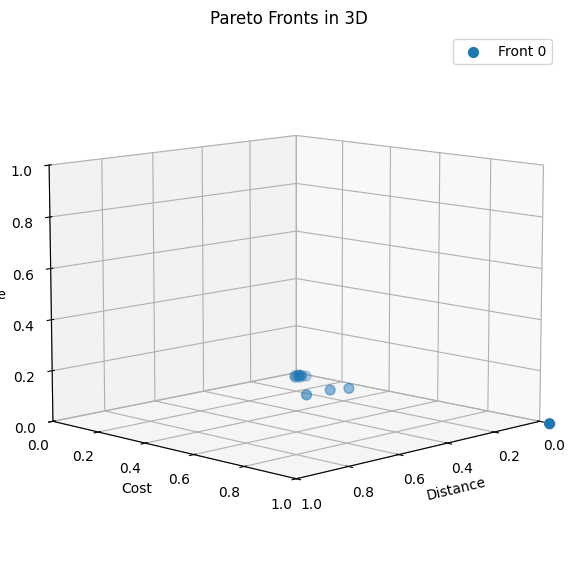

132 63
132 132
107 51
107 107
111 75
111 111
9 60
9 9
30 27
30 30
69 122
69 69
119 69
119 119
100 137
100 100
137 100
137 137
103 111
103 103
76 40
76 76
10 19
10 10
5 127
5 5
5 127
5 5
73 120
73 73
73 130
73 73
9 93
9 9
28 69
28 28
17 73
17 17
83 128
83 83
93 48
93 93
48 93
48 48
104 78
104 104
81 116
81 81
94 100
94 94
100 94
100 100
41 81
41 41
80 25
80 80
13 16
13 13
33 6
33 33
33 6
33 33
45 83
45 45
43 126
43 43
8 118
8 8
89 138
89 89
138 89
138 138
120 102
120 120
129 29
129 129
109 66
109 109
111 84
111 111
68 42
68 68
68 42
68 68
68 42
68 68
33 10
33 33
33 10
33 33
73 29
73 73
41 101
41 41
5 80
5 5
80 5
80 80
132 61
132 132
66 83
66 66
48 6
48 48
48 6
48 48
64 46
64 64
64 46
64 64
71 40
71 71
71 40
71 71
71 40
71 71
138 100
138 138
25 16
25 25
116 19
116 116
92 63
92 92
13 11
13 13
99 25
99 99
36 118
36 36
55 83
55 55
37 5
37 37
109 94
109 109
10 80
10 10
85 72
85 85
3 111
3 3
117 137
117 117
19 130
19 19
121 64
121 121
17 48
17 17
17 48
17 17
48 17
48 48
103 38
103 103
38 103


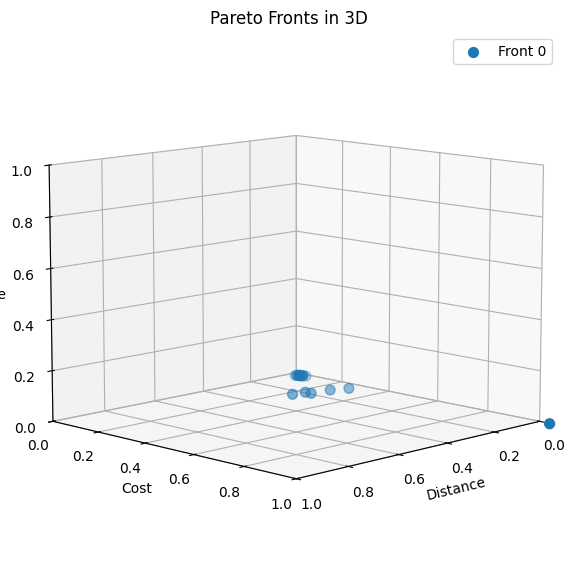

37 25
37 37
84 69
84 84
48 81
48 48
133 5
133 133
73 78
73 73
25 130
25 25
130 25
130 130
127 31
127 127
71 66
71 71
93 17
93 93
25 100
25 25
92 2
92 92
80 75
80 80
29 31
29 29
37 38
37 37
100 40
100 100
100 40
100 100
100 40
100 100
73 128
73 73
31 117
31 31
50 55
50 50
19 122
19 19
19 122
19 19
105 29
105 105
115 11
115 115
72 6
72 72
6 72
6 6
28 95
28 28
31 11
31 31
116 117
116 116
63 128
63 63
74 5
74 74
120 18
120 120
18 120
18 18
3 6
3 3
87 109
87 87
25 78
25 25
25 78
25 25
78 25
78 78
59 33
59 59
3 28
3 3
105 103
105 105
127 80
127 127
80 127
80 80
19 83
19 19
109 64
109 109
4 37
4 4
63 71
63 63
83 130
83 83
13 75
13 13
11 3
11 11
41 31
41 41
59 85
59 59
70 103
70 70
15 80
15 15
74 118
74 74
83 42
83 83
83 42
83 83
83 42
83 83
23 81
23 23
43 50
43 43
78 16
78 78
127 69
127 127
108 87
108 108
117 83
117 117
130 25
130 130
100 84
100 100
84 100
84 84
125 71
125 125
10 117
10 10
117 10
117 117
93 43
93 93
31 117
31 31
101 109
101 101
120 18
120 120
73 103
73 73
6 17
6 6
15 100
15 1

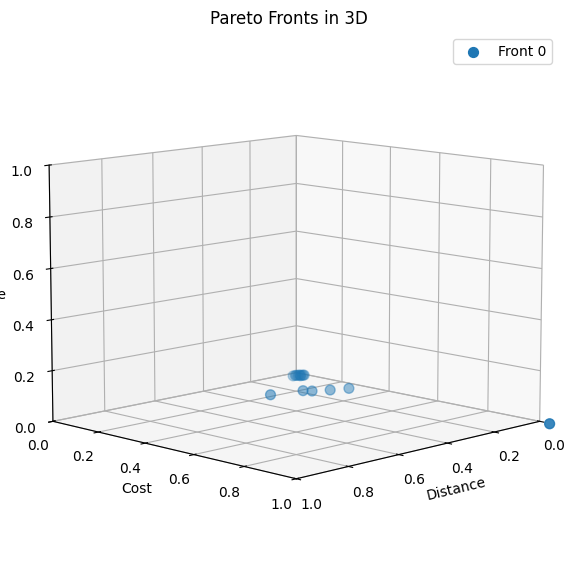

10 93
10 10
2 3
2 2
64 130
64 64
130 64
130 130
57 100
57 57
116 103
116 116
7 93
7 7
28 83
28 28
0 3
0 0
90 101
90 90
25 76
25 25
25 41
25 25
38 10
38 38
17 95
17 17
126 78
126 126
78 126
78 78
13 17
13 13
127 92
127 127
33 9
33 33
82 117
82 82
106 80
106 106
74 8
74 74
122 109
122 122
12 85
12 12
81 59
81 81
59 81
59 59
95 84
95 95
84 95
84 84
10 83
10 10
33 37
33 33
16 2
16 16
31 137
31 31
108 117
108 108
5 100
5 5
14 116
14 14
83 25
83 83
25 18
25 25
76 50
76 76
107 25
107 107
109 31
109 109
10 19
10 10
74 6
74 74
57 31
57 57
7 31
7 7
37 93
37 37
11 14
11 11
14 11
14 14
127 128
127 127
128 127
128 128
80 128
80 80
6 50
6 6
13 44
13 13
118 30
118 118
36 45
36 36
45 36
45 45
63 50
63 63
74 137
74 74
13 3
13 13
6 64
6 6
63 31
63 63
84 10
84 84
10 84
10 10
117 14
117 117
14 117
14 14
7 84
7 7
95 50
95 95
50 95
50 50
68 77
68 68
44 127
44 44
73 8
73 73
78 95
78 78
17 126
17 17
126 17
126 126
58 25
58 58
7 128
7 7
93 128
93 93
9 50
9 9
0 43
0 0
100 2
100 100
2 100
2 2
59 125
59 59
2 31
2

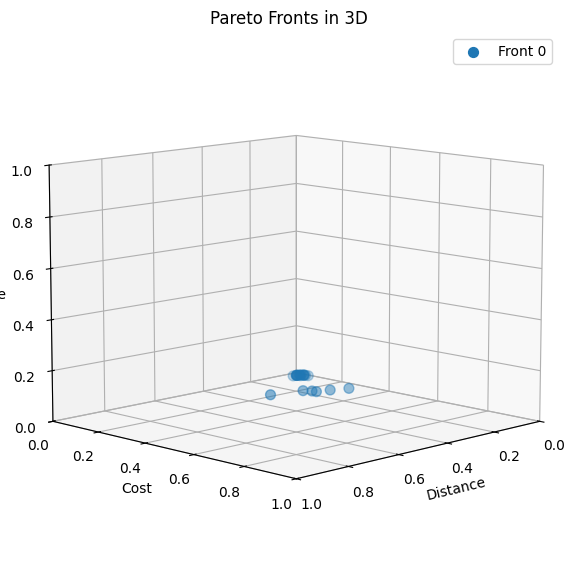

15 3
15 15
87 10
87 87
10 85
10 10
83 9
83 83
84 138
84 84
138 84
138 138
8 128
8 8
55 87
55 55
117 83
117 117
105 41
105 105
82 117
82 82
31 77
31 31
77 31
77 77
111 115
111 111
11 50
11 11
119 117
119 119
31 50
31 31
132 12
132 132
92 39
92 92
80 85
80 80
74 116
74 74
18 117
18 18
131 63
131 131
64 127
64 64
10 59
10 10
59 10
59 59
6 25
6 6
38 130
38 38
10 37
10 10
37 10
37 37
78 31
78 78
93 9
93 93
126 30
126 126
39 109
39 39
59 18
59 59
2 117
2 2
29 84
29 29
37 31
37 37
31 37
31 31
74 133
74 74
33 10
33 33
107 103
107 107
91 117
91 91
11 117
11 11
74 9
74 74
120 59
120 120
48 74
48 48
95 76
95 95
0 109
0 0
109 0
109 109
128 81
128 128
84 12
84 84
3 64
3 3
81 93
81 81
125 127
125 125
117 93
117 117
93 117
93 93
81 11
81 81
126 85
126 126
80 115
80 80
10 39
10 10
87 78
87 87
6 92
6 6
92 6
92 92
74 44
74 74
93 78
93 93
93 78
93 93
117 93
117 117
111 130
111 111
45 115
45 45
17 83
17 17
18 128
18 18
4 9
4 4
115 93
115 115
41 85
41 41
28 73
28 28
5 118
5 5
19 31
19 19
30 11
30 30
11 30


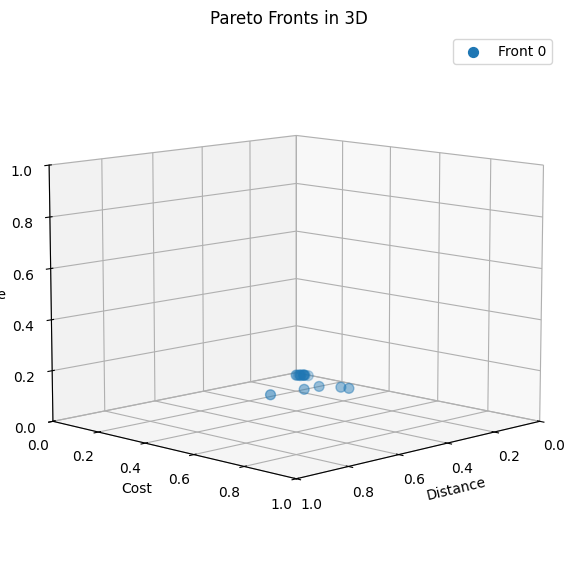

106 9
106 106
13 78
13 13
13 78
13 13
45 132
45 45
11 28
11 11
106 25
106 106
5 117
5 5
13 118
13 13
81 93
81 81
2 80
2 2
63 85
63 63
131 115
131 131
82 109
82 82
57 126
57 57
5 30
5 5
1 117
1 1
83 31
83 83
68 10
68 68
6 10
6 6
116 31
116 116
108 77
108 108
29 128
29 29
54 100
54 54
86 100
86 86
125 14
125 125
80 37
80 80
31 45
31 31
115 18
115 115
16 50
16 16
33 77
33 33
133 3
133 133
23 117
23 23
6 117
6 6
60 95
60 60
12 92
12 12
78 11
78 78
54 8
54 54
13 76
13 13
115 93
115 115
93 115
93 93
28 83
28 28
9 84
9 9
36 84
36 36
77 6
77 77
23 73
23 23
19 2
19 19
84 6
84 84
6 84
6 6
103 33
103 103
59 6
59 59
55 95
55 55
55 95
55 55
105 31
105 105
130 25
130 130
14 13
14 14
87 109
87 87
111 117
111 111
16 38
16 16
57 115
57 57
11 85
11 11
9 31
9 9
55 128
55 55
73 83
73 73
107 11
107 107
6 14
6 6
18 127
18 18
116 76
116 116
107 85
107 107
85 73
85 85
30 92
30 30
92 30
92 92
37 117
37 37
92 93
92 92
73 117
73 73
78 33
78 78
33 78
33 33
127 115
127 127
31 64
31 31
12 9
12 12
1 28
1 1
84 78
84 

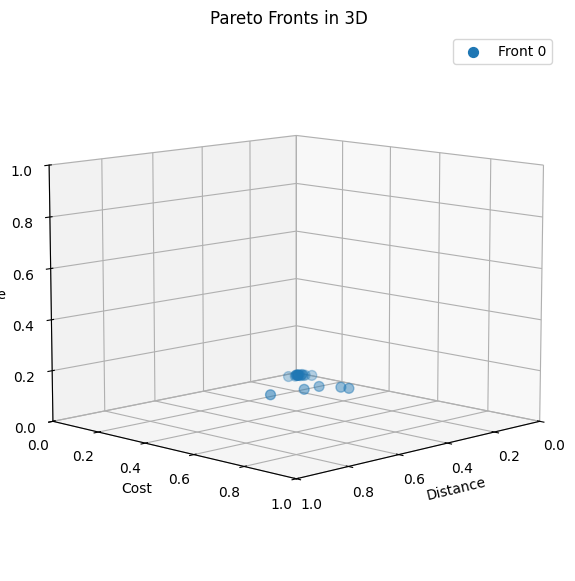

35 12
35 35
73 54
73 73
3 5
3 3
33 31
33 33
31 33
31 31
109 117
109 109
11 111
11 11
111 11
111 111
125 115
125 125
16 85
16 16
31 12
31 31
17 63
17 17
82 132
82 82
95 3
95 95
80 77
80 80
84 11
84 84
86 115
86 86
76 117
76 76
91 45
91 91
60 84
60 60
117 30
117 117
93 25
93 93
109 6
109 109
77 59
77 77
93 66
93 93
92 117
92 92
55 73
55 55
33 19
33 33
57 85
57 57
74 130
74 74
16 9
16 16
60 10
60 60
2 83
2 2
91 117
91 91
120 126
120 120
31 50
31 31
11 6
11 11
6 11
6 6
18 6
18 18
80 117
80 80
74 109
74 74
7 84
7 7
29 80
29 29
108 115
108 108
35 117
35 35
63 13
63 63
13 63
13 13
117 11
117 117
117 12
117 117
10 117
10 10
23 84
23 23
31 12
31 31
78 19
78 78
54 73
54 54
45 12
45 45
18 103
18 18
118 109
118 118
38 9
38 38
127 11
127 127
76 80
76 76
45 127
45 45
2 64
2 2
74 117
74 74
10 17
10 10
8 63
8 8
90 31
90 90
60 12
60 60
85 93
85 85
73 11
73 73
115 18
115 115
31 10
31 31
76 92
76 76
13 14
13 13
31 73
31 31
25 95
25 25
29 116
29 29
9 108
9 9
93 83
93 93
13 111
13 13
63 33
63 63
23 117
23 

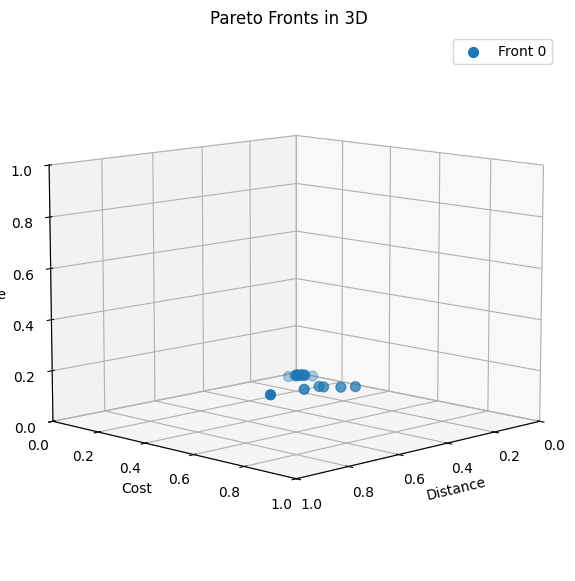

84 116
84 84
48 33
48 48
93 117
93 93
30 11
30 30
11 30
11 11
84 77
84 84
55 117
55 55
1 28
1 1
9 28
9 9
57 63
57 57
55 95
55 55
59 109
59 59
105 84
105 105
18 126
18 18
115 118
115 115
80 54
80 80
107 14
107 107
76 117
76 76
28 55
28 28
103 31
103 103
91 11
91 91
23 117
23 23
31 132
31 31
132 31
132 132
25 12
25 25
31 6
31 31
17 10
17 17
117 74
117 117
2 84
2 2
63 18
63 63
85 18
85 85
132 92
132 132
95 103
95 95
25 76
25 25
89 10
89 89
82 14
82 82
48 6
48 48
31 18
31 31
109 31
109 109
55 93
55 55
2 31
2 2
109 85
109 109
84 118
84 84
118 84
118 118
60 84
60 60
95 115
95 95
44 12
44 44
127 84
127 127
84 127
84 84
16 12
16 16
107 117
107 107
74 81
74 74
14 117
14 14
80 11
80 80
109 31
109 109
29 18
29 29
31 25
31 31
25 31
25 25
18 31
18 18
12 73
12 12
31 17
31 31
17 31
17 17
117 39
117 117
39 117
39 39
82 64
82 82
63 31
63 63
44 30
44 44
117 127
117 117
117 111
117 117
111 117
111 111
115 92
115 115
17 11
17 17


In [ ]:
import random
import numpy as np
import folium
import matplotlib.pyplot as plt
import math
import ast
import plotly.graph_objects as go

from os import replace
from pymoo.core.crossover import Crossover
from pymoo.core.problem import Problem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population
from pymoo.core.crossover import Crossover
from pymoo.operators.selection.rnd  import RandomSelection
from pymoo.core.sampling import Sampling
from geopy.distance import geodesic
from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim
from pymoo.core.callback import Callback
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.core.selection import Selection
from pymoo.visualization.scatter import Scatter
from pymoo.core.mutation import Mutation
from mpl_toolkits import mplot3d
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from mpl_toolkits.mplot3d import Axes3D
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.util.dominator import Dominator
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from pymoo.termination.xtol import DesignSpaceTermination
from pymoo.termination.robust import RobustTermination
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pymoo.util.dominator import Dominator
from pymoo.util.nds.non_dominated_sorting import NonDominatedSorting
from pymoo.core.survival import Survival
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.operators.survival.rank_and_crowding import RankAndCrowding
from scipy.spatial.distance import pdist
from pymoo.indicators.gd import GD
from pymoo.indicators.hv import HV

def repairSolution(solution, n_var):
   solution = [int(row) for row in solution]

   sample = np.zeros(n_var)




   if(solution[0] != 0):

        length = solution[0] * GeneticAlgorithmConfig.timePlaceMappingSize
        head, interior, tail = getSliceRoute(solution)
        uniqueList = []

        for i in range(0, len(interior),GeneticAlgorithmConfig.timePlaceMappingSize):
          currentLocation = getLocationById(interior[i])
          if(currentLocation["type"].values[0] == "hotel"):
              if(interior[i] != head[0]):
                 interior[i] = head[0]


          if(interior[i] not in uniqueList):
            for j in range(i, i+GeneticAlgorithmConfig.timePlaceMappingSize, 1):
              uniqueList.append(interior[j])
        lengthSolution = int((len(uniqueList) // GeneticAlgorithmConfig.timePlaceMappingSize))

        uniqueList = [lengthSolution] + head + uniqueList + tail
        return uniqueList

   else:
      return solution


def isValidSolution(solution):
   solution = [int(row) for row in solution]
   startRoute = 1
   endRoute  = (solution[0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)
   for i in range(startRoute,
                  endRoute,
                  GeneticAlgorithmConfig.timePlaceMappingSize):

      currentLocationId = solution[i]
      nextLocationId = solution[i+GeneticAlgorithmConfig.timePlaceMappingSize]
      currentLocation = getLocationById(currentLocationId)
      nextLocation = getLocationById(nextLocationId)
      if(currentLocation["type"].values[0] == "hotel" and
            nextLocation["type"].values[0] == "hotel"):
        return False
   totalTime = 0

   for i in range(startRoute,
                  endRoute,
                  GeneticAlgorithmConfig.timePlaceMappingSize):
      totalTime += solution[i+1] * 15

   if(totalTime > 840):
     return False

   return True



def createSolution(n_var):
    sample = [-1 for _ in range(n_var)]
    while True:
      hotel = locations[locations["type"] == "hotel"].sample(n=1)
      hotelId = hotel["Id"].values[0]

      rand = random.randint(0, GeneticAlgorithmConfig.totalRouteSize)
      time = 8
      if(userPreference["Resort"] == 5):
        time = 16

      currentLocationSize = rand
      start = GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * GeneticAlgorithmConfig.timePlaceMappingSize)
      end = (start + (rand * GeneticAlgorithmConfig.timePlaceMappingSize))
      sample[0] = currentLocationSize
      sample[1] = hotelId
      sample[2] = time
      sample[end] = hotelId
      sample[end+1] = time
      for i in range(start, end, GeneticAlgorithmConfig.timePlaceMappingSize):
          if(np.random.rand() < 0.1):
            sample[i] = hotelId
          else:
            location = locations[locations["type"] != "hotel"].sample(n=1)
            sample[i] = location["Id"].values[0]

          time = np.random.randint(1, 8)
          sample[i+1] = time
      if(isValidSolution(sample)):
        break

    return sample

n_obj = 3
best_per_generation = []



class CustomeCallback(Callback):
    global true_pf
    def __init__(self, n_obj):
        super().__init__()
        self.n_obj = n_obj
        self.pareto_fronts = []


    def notify(self, algorithm):
        F = algorithm.pop.get("F")  # دریافت مقدار Fitness
        X = algorithm.pop.get("X")

        if(algorithm.n_gen == 1):
           GeneticAlgorithmConfig.best = []
           GeneticAlgorithmConfig.cost_variance = []
           GeneticAlgorithmConfig.distance_variance = []
           GeneticAlgorithmConfig.rate_variance = []

           GeneticAlgorithmConfig.distance_diversity = []
           GeneticAlgorithmConfig.cost_diversity = []
           GeneticAlgorithmConfig.rate_diversity = []
           GeneticAlgorithmConfig.GD = []
           GeneticAlgorithmConfig.HV = []
           F = algorithm.pop.get("F")

           GeneticAlgorithmConfig.ref_points =  np.max(F, axis=0)
           GeneticAlgorithmConfig.cd = []
           GeneticAlgorithmConfig.mpd_decision = []
           GeneticAlgorithmConfig.mpd_objective = []

        GeneticAlgorithmConfig.number_genrations = algorithm.n_gen

        crowding = algorithm.pop.get("crowding")


        if algorithm.pop is not None:
            F = algorithm.pop.get("F")
            pareto_indices = NonDominatedSorting().do(F, only_non_dominated_front=False)

            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')


            for i, front in enumerate(pareto_indices):
                if(i == 0):
                  front_indices = np.array(front, dtype=int)  # تبدیل لیست ایندکس‌ها به آرایه صحیح
                  front_points = F[front_indices]  # مقدارهای تابع هدف در جبهه پارتو
                  solution_points = X[front_indices]
                  sums = list(map(sum, zip(front_points[:, 0], front_points[:, 1], front_points[:, 2])))

                  GeneticAlgorithmConfig.best.append(min(sums))
                  GeneticAlgorithmConfig.distance_variance.append(np.std(front_points[:, 0]))
                  GeneticAlgorithmConfig.cost_variance.append(np.std(front_points[:, 1]))
                  GeneticAlgorithmConfig.rate_variance.append(np.std(front_points[:, 2]))
                  cd_values = crowding[front_indices]
                  finite_cd = cd_values[np.isfinite(cd_values)]  # فقط مقادیر محدود (نه inf)
                  avg_cd = np.mean(finite_cd)
                  GeneticAlgorithmConfig.cd.append(avg_cd)

                  GeneticAlgorithmConfig.mpd_decision.append(meanPairwiseDistance(solution_points))
                  GeneticAlgorithmConfig.mpd_objective.append(np.mean(pdist(front_points, metric='euclidean')))
                  ind = HV(ref_point=GeneticAlgorithmConfig.ref_points)
                  hv = ind(np.vstack(front_points))
                  GeneticAlgorithmConfig.HV.append(hv)
                  # print(front_points)
                  # for solution in solution_point:
                  #   print(solution[0:(solution[0]*2)+5])
                  #   print('----------------------------------')
                  # print('--------------------------')
                  ax.scatter(front_points[:, 0], front_points[:, 1], front_points[:, 2],
                            label=f'Front {i}', s=50)


            ax.set_xlim3d(0, 1)
            ax.set_ylim3d(0, 1)
            ax.set_zlim3d(0, 1)
            ax.view_init(elev=10, azim=45)
            ax.set_title("Pareto Fronts in 3D")
            ax.set_xlabel("Distance")
            ax.set_ylabel("Cost")
            ax.set_zlabel("Rate")
            ax.set_title('Pareto Fronts in 3D')
            ax.legend()
            plt.show()

            # # نمایش دسته‌بندی‌ها
            # for i, front in enumerate(pareto_fronts):
            #     if(i == 0):
            #       print(f"Pareto Front {i+1}:")
            #       print(f"index:{i+1}, {front}")
            # print('------------------------------')



            # for i, solutions in enumerate(pareto_solutions):
            #     if(i == 0):
            #       print(f"solution {i+1}:")
            #       count_route, total_distance, total_cost, total_rate = getSingleObjective(solutions,
            #                                                                                GeneticAlgorithmConfig.preference)

            #       for i in range(len(total_distance)):
            #          print(f"{count_route[i]}->({total_distance[i]}, {total_cost[i]}, {total_rate[i]})")

            # print('-------------------------')

class CustomMutation(Mutation):
    def __init__(self,
                 change_rate=0.05,
                 swap_rate=0.05,
                 new_rate=0.05,
                 new_time=0.05
                 ):
        super().__init__()
        self.change_rate = change_rate  # احتمال جهش
        self.swap_rate = swap_rate
        self.new_rate  = new_rate
        self.new_time = new_time

    def _do(self, problem, X, **kwargs):
        X_mutated = X.copy()
        n, d = X.shape  # تعداد کروموزوم‌ها و متغیرها

        for i in range(n):

            if (np.random.rand() < self.change_rate):
                if X_mutated[i, 0] > 2:
                  j = np.random.randint(2, X_mutated[i, 0])  # انتخاب یک ژن تصادفی برای تغییر
                  if(j % 2 == 0):
                    j += 1
                  old = X_mutated[i, j]
                  X_mutated[i, j] = getLocation()
                  time = np.random.randint(1, 8)
                  X_mutated[i, j+1] = time
                  # new = X_mutated[i, j]
                  # print(f"{old} -> {new}")
                  # print('------------------------')
            if(np.random.rand() < self.swap_rate):
                head, interior, tail = getSliceRoute(X_mutated[i])

                point1 = 0
                point2 = 0
                if(len(interior) > 1):
                   if(len(interior) == 4):

                      point1 = 0
                      point2 = 2
                      temp = interior[point1]
                      temp_time = interior[point1+1]
                      interior[point1] = interior[point2]
                      interior[point1+1] = interior[point2+1]
                      interior[point2] = temp
                      interior[point2+1] = temp_time

                      length = int(len(interior) // GeneticAlgorithmConfig.timePlaceMappingSize)
                      sample = [length] + list(head) + list(interior) + list(tail)
                      for j in range(len(sample)):
                          X_mutated[i, j] = sample[j]

                      # print(f"{interior[point1]} -> {interior[point2]}")
                      # print('------------------------------------')
                   elif(len(interior) > 4):

                      point1 = np.random.randint(0, len(interior)-2)
                      point2 = np.random.randint(0, len(interior)-2)

                      if(point1 % 2 != 0):
                         point1 += 1
                      if(point2 % 2 != 0):
                         point2 += 1
                      temp = interior[point1]
                      temp_time = interior[point1+1]
                      interior[point1] = interior[point2]
                      interior[point1+1] = interior[point2+1]
                      interior[point2] = temp
                      interior[point2+1] = temp_time
                      length = int(len(interior) // GeneticAlgorithmConfig.timePlaceMappingSize)
                      sample = [length] + list(head) + list(interior) + list(tail)
                      for j in range(len(sample)):
                          X_mutated[i, j] = sample[j]


            if(np.random.rand() < self.new_rate):
                  head, interior, tail = getSliceRoute(X_mutated[i])
                  old = X_mutated[i]
                  point = 0
                  newLocation = getLocation()
                  time = np.random.randint(1, 8)
                  if(len(interior) > 1):
                     point = np.random.randint(0, len(interior))
                     if(point % 2 != 0):
                        point += 1
                  interior = list(interior)
                  interior.insert(point, newLocation)
                  interior.insert(point+1, time)
                  length = len(interior) // GeneticAlgorithmConfig.timePlaceMappingSize
                  newRoute = [length] + list(head) + list(interior) + list(tail)
                  newRoute = repairSolution(newRoute, GeneticAlgorithmConfig.n_var)
                  # print(f"old: {old}")
                  # print(f"new: {newRoute}")
                  # print(f"value:{newLocation}, {time}")
                  # print('-----------------------------')
                  for j in range(len(newRoute)):
                      X_mutated[i, j] = newRoute[j]
            if(np.random.rand() < self.new_time):
              if X_mutated[i, 0] > 2:
                  j = np.random.randint(2, X_mutated[i, 0])
                  if(j % 2 == 0):
                    j += 1
                  time = np.random.randint(1, 8)
                  X_mutated[i, j+1] = time

            repair = repairSolution(X_mutated[i], GeneticAlgorithmConfig.n_var)

            for j in range(len(repair)):
                  X_mutated[i, j] = repair[j]

        return X_mutated



class CustomSampling(Sampling):
    def __init__(self, prefernces, **kwargs):
        self.prefernces = prefernces
        super().__init__(**kwargs)

    def _do(self, problem, n_samples, **kwargs):
        n_var = problem.n_var  # تعداد متغیرها
        xl = problem.xl        # حد پایین متغیرها
        xu = problem.xu        # حد بالا متغیرها
        samples = np.zeros([n_samples, n_var], dtype=int)

        for row in range(len(samples)):
            samples[row] = createSolution(n_var)


        # for sample in samples:
        #    print(sample[0:(sample[0] * 2) + 5])
        # print('-------------------------------')
        return samples






def getObjective(routes, prefernces):
    total_distance = []
    total_cost = []
    total_rate = []
    T = 8 * 4

    for route in routes:

        deltaT = 0
        totalTime = 0
        M = 0
        L = route[0] + 1

        countHotel = 0
        route = route.astype(int)
        distance = 0
        cost = 0
        rate = 0
        averageRate = 0
        startRoute = 1
        endRoute  = (route[0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)


        # calculate distance
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):

            totalTime += route[i + 1]

            start, end = int(route[i]), int(route[i + GeneticAlgorithmConfig.timePlaceMappingSize])
            start = locations[locations["Id"] == start]
            end = locations[locations["Id"] == end]
            start_lat, start_lon = start["Latitude"].values[0], start["Longitude"].values[0]
            end_lat, end_lon = end["Latitude"].values[0], end["Longitude"].values[0]
            distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)
        if(GeneticAlgorithmConfig.number_genrations == 1):
          if(GeneticAlgorithmConfig.maxDistance < distance):
            GeneticAlgorithmConfig.maxDistance = distance

        detalT = abs(totalTime - T)
        M = L / detalT

        if(M != np.inf):
          distance /= M

        # caculate rate
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):
          averageRate = 0
          node = locations[locations["Id"] == route[i]]

          if(len(node["tag"]) > 0):
            tags = node["tag"].values[0]
            tags = str(tags).replace("[" ,"")
            tags = str(tags).replace("'" ,"")
            tags = str(tags).replace(']', "")
            tags = str(tags).replace(' ', "")
            tags = str(tags).split(',')

            for tag in tags:
              if(tag in prefernces):

                averageRate += node['Stars'].values[0] * prefernces[tag]
            averageRate /=  len(tags)
            rate += route[i+1] * averageRate
        if(GeneticAlgorithmConfig.number_genrations == 1):
          if(GeneticAlgorithmConfig.maxRate < rate):
            GeneticAlgorithmConfig.maxRate = rate
        rate = detalT / rate


        # caculate cost
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):

            node = locations[locations["Id"] == route[i]]
            cost += node["Price"].values[0]
        if(GeneticAlgorithmConfig.number_genrations == 1):
          if(GeneticAlgorithmConfig.maxCost < cost):
            GeneticAlgorithmConfig.maxCost = cost

        if(M != np.inf):
          cost /= M

        total_distance.append(distance)
        total_cost.append(cost)
        total_rate.append(rate)


    for i in range(len(total_distance)):
      total_distance[i] /= GeneticAlgorithmConfig.maxDistance
      total_distance[i] = float(format(total_distance[i], ".6f"))


    for i in range(len(total_cost)):
      total_cost[i] /= GeneticAlgorithmConfig.maxCost
      total_cost[i] = float(format(total_cost[i], ".6f"))


    for i in range(len(total_rate)):
      total_rate[i] /= GeneticAlgorithmConfig.maxRate
      total_rate[i] = float(format(total_rate[i], ".6f"))

    return (total_distance,
            total_cost,
            total_rate)

def getSingleObjective(routes, prefernces):
    total_distance = []
    total_cost = []
    total_rate = []
    count_route = []

    for route in routes:
        count_route.append(route[0])

        deltaT = 0
        totalTime = 0
        M = 0
        L = route[0] + 1

        countHotel = 0
        route = route.astype(int)
        distance = 0
        cost = 0
        rate = 0
        averageRate = 0
        startRoute = 1
        endRoute  = (route[0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)


        # calculate distance
        for i in range(startRoute, endRoute, GeneticAlgorithmConfig.timePlaceMappingSize):

            totalTime += route[i + 1]

            start, end = int(route[i]), int(route[i + GeneticAlgorithmConfig.timePlaceMappingSize])
            start = locations[locations["Id"] == start]
            end = locations[locations["Id"] == end]
            start_lat, start_lon = start["Latitude"].values[0], start["Longitude"].values[0]
            end_lat, end_lon = end["Latitude"].values[0], end["Longitude"].values[0]
            distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)

        # caculate rate
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):
          averageRate = 0
          node = locations[locations["Id"] == route[i]]

          if(len(node["tag"]) > 0):
            tags = node["tag"].values[0]
            tags = str(tags).replace("[" ,"")
            tags = str(tags).replace("'" ,"")
            tags = str(tags).replace(']', "")
            tags = str(tags).replace(' ', "")
            tags = str(tags).split(',')
            # print(f"tag: {tags}")
            for tag in tags:
                averageRate += node['Stars'].values[0] * prefernces[tag]
            averageRate /= len(tags)
            rate += averageRate
            rate += route[i+1] * averageRate

        # caculate cost
        for i in range(startRoute,
                       endRoute,
                       GeneticAlgorithmConfig.timePlaceMappingSize):

            node = locations[locations["Id"] == route[i]]
            cost += node["Price"].values[0]
        total_distance.append(distance)
        total_cost.append(cost)
        total_rate.append(rate)

    return (count_route,
            total_distance,
            total_cost,
            total_rate)

class HotelRouteProblem(Problem):
    def __init__(self, n_var, prefernces=None):
      self.prefernces = prefernces
      super().__init__(n_var=n_var,
                         n_obj=3,
                         n_constr=0,
                         xl=0,
                         xu=len(locations) - 1)

    def _evaluate(self, x, out, *args, **kwargs):
        total_distance, total_cost, total_rate = getObjective(x, self.prefernces)
        out["F"] = np.column_stack([total_distance, total_cost, total_rate])




class CustomeCrossover(Crossover):
    def __init__(self):
        super().__init__(2,2)

    def _do(self, problem, X, **kwargs):
        _, n_matings, n_var = X.shape
        Y = np.full_like(X, None, dtype=object)

        for k in range(n_matings):
            while True:
              # انتخاب والدین
              parent1 = [int(item) for item in X[0, k]]
              parent2 = [int(item) for item in X[1, k]]

              head1, interior1, tail1 = getSliceRoute(parent1)
              head2, interior2, tail2 = getSliceRoute(parent2)

              point1 = 0
              point2 = 0
              if((len(interior1) // GeneticAlgorithmConfig.timePlaceMappingSize) > 0):
                  point1  = np.random.randint(0, len(interior1) / GeneticAlgorithmConfig.timePlaceMappingSize)

              if((len(interior2) // GeneticAlgorithmConfig.timePlaceMappingSize) > 0):
                point2 = np.random.randint(0, len(interior2) / GeneticAlgorithmConfig.timePlaceMappingSize)

              child1 = interior1[:point1*GeneticAlgorithmConfig.timePlaceMappingSize] + interior2[point2*GeneticAlgorithmConfig.timePlaceMappingSize:]
              child2 = interior2[:point2*GeneticAlgorithmConfig.timePlaceMappingSize] + interior1[point1*GeneticAlgorithmConfig.timePlaceMappingSize:]

              lenChild1 = int(len(child1) // GeneticAlgorithmConfig.timePlaceMappingSize)
              lenChild2 = int(len(child2) // GeneticAlgorithmConfig.timePlaceMappingSize)

              child1 = [lenChild1] + head1 + child1 + tail1
              child2 = [lenChild2] + head2 + child2 + tail2

              # print(f"parent1: {parent1}")
              # print(f"parent2: {parent2}")

              # display(HTML(f"""</span><span style='color:green'>{interior1[:point1*GeneticAlgorithmConfig.timePlaceMappingSize]}</span>
              #   <span style='color:orange'>{interior2[point2*GeneticAlgorithmConfig.timePlaceMappingSize:]}</span>"""))
              # display(HTML(f"""</span><span style='color:orange'>{interior2[:point2*GeneticAlgorithmConfig.timePlaceMappingSize]}</span>
              #   <span style='color:green'>{interior1[point1*GeneticAlgorithmConfig.timePlaceMappingSize:]}</span>"""))
              # print(f"child1: {child1}")
              # print(f"child2: {child2}")
              # print('--------------------------')
              childSample1  = np.zeros(n_var)
              childSample2  = np.zeros(n_var)

              child1 = repairSolution(child1, n_var)
              child2 = repairSolution(child2, n_var)

              for i in range(len(child1)):
                childSample1[i] = child1[i]
              for i in range(len(child2)):
                  childSample2[i] = child2[i]
              break

            Y[0, k] = childSample1
            Y[1, k] = childSample2

        return Y


n_var = GeneticAlgorithmConfig.n_var

callback = CustomeCallback(n_obj=3)
GeneticAlgorithmConfig.preference = userPreference
algorithm = NSGA2(pop_size=500,
                  sampling=CustomSampling(prefernces=userPreference),
                  crossover=CustomeCrossover(),
                  callback=callback,
                  mutation=CustomMutation(),
                  )



termination = RobustTermination(DesignSpaceTermination(tol=0.01), period=20)

problem = HotelRouteProblem(n_var=n_var, prefernces=userPreference)
res = minimize(problem,
               algorithm,
               termination=("n_gen", 100),
               verbose=True,
               eliminate_duplicates=False)



pareto_indices = NonDominatedSorting().do(res.F, only_non_dominated_front=False)
# دسته‌بندی پارتو
pareto_fronts = [res.F[idx] for idx in pareto_indices]
pareto_solutions = [res.X[idx] for idx in pareto_indices]

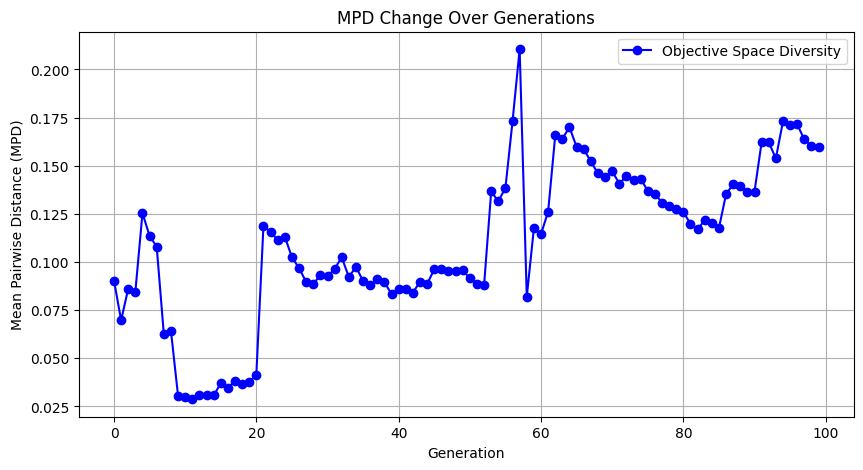

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(GeneticAlgorithmConfig.mpd_objective)), GeneticAlgorithmConfig.mpd_objective, label="Objective Space Diversity", marker='o', linestyle='-', color='b')
plt.xlabel("Generation")
plt.ylabel("Mean Pairwise Distance (MPD)")
plt.title("MPD Change Over Generations")
plt.legend()
plt.grid()
plt.show()

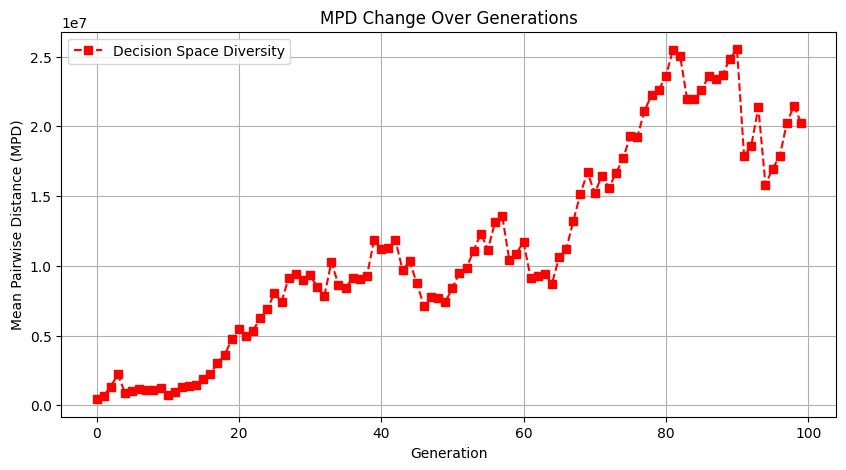

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(GeneticAlgorithmConfig.mpd_decision)), GeneticAlgorithmConfig.mpd_decision, label="Decision Space Diversity", marker='s', linestyle='--', color='r')
plt.xlabel("Generation")
plt.ylabel("Mean Pairwise Distance (MPD)")
plt.title("MPD Change Over Generations")
plt.legend()
plt.grid()
plt.show()

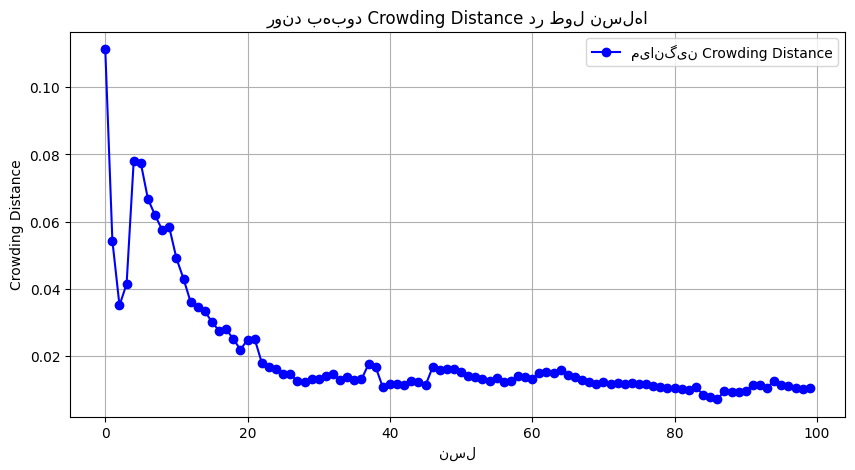

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(GeneticAlgorithmConfig.cd, label="میانگین Crowding Distance", marker="o", color="blue")
plt.xlabel("نسل")
plt.ylabel("Crowding Distance")
plt.title("روند بهبود Crowding Distance در طول نسل‌ها")
plt.legend()
plt.grid()
plt.show()

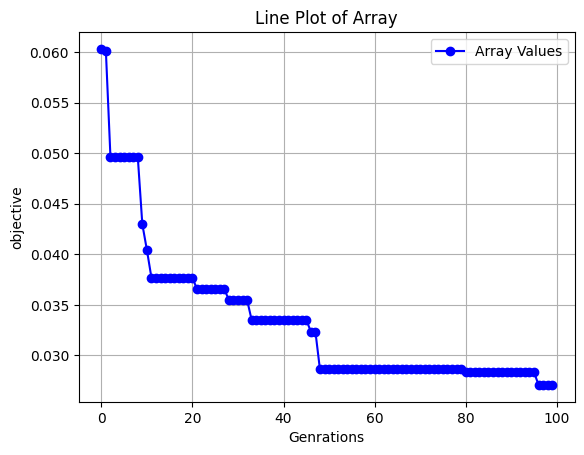

In [22]:
plt.plot(range(len(GeneticAlgorithmConfig.best)), GeneticAlgorithmConfig.best, marker='o', linestyle='-', color='b', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("Line Plot of Array")
plt.legend()
plt.grid(True)
plt.show()

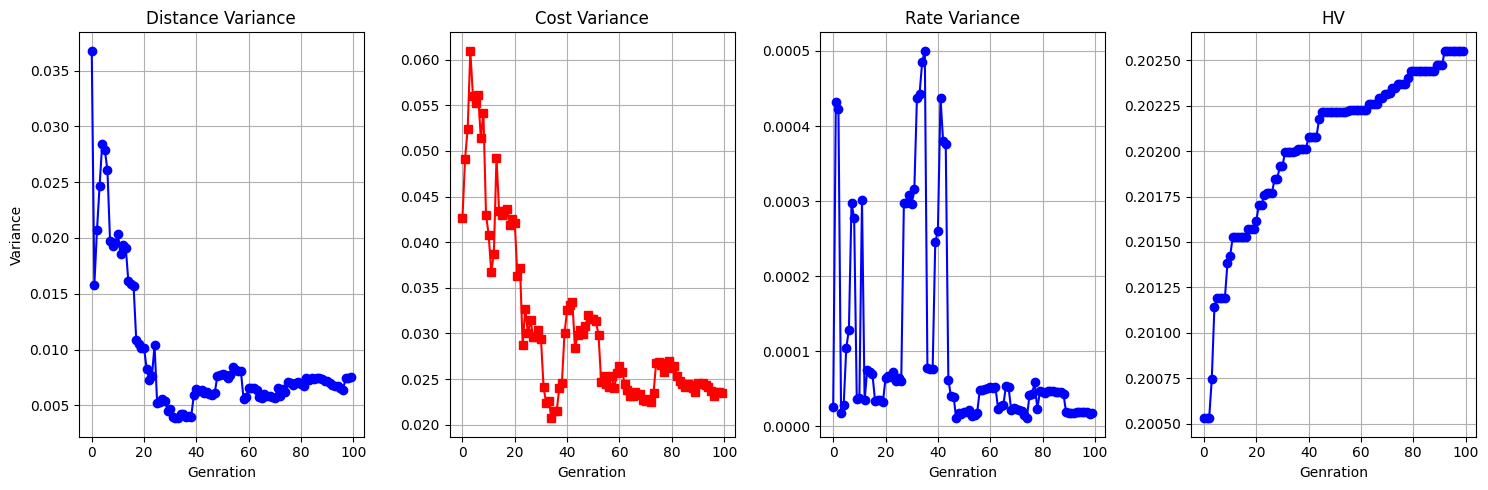

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# رسم نمودار واریانس

fig, axes = plt.subplots(1, 4, figsize=(15, 5))


axes[0].plot(GeneticAlgorithmConfig.distance_variance, 'b-o', label='Distance Variance')
axes[0].set_title("Distance Variance")
axes[0].set_xlabel("Genration")
axes[0].set_ylabel("Variance")
axes[0].grid(True)

# نمودار واریانس هزینه
axes[1].plot(GeneticAlgorithmConfig.cost_variance, 'r-s', label='Cost Variance')
axes[1].set_title("Cost Variance")
axes[1].set_xlabel("Genration")
axes[1].grid(True)

# نمودار واریانس نرخ
axes[2].plot(range(len(GeneticAlgorithmConfig.rate_variance)), GeneticAlgorithmConfig.rate_variance, 'b-o', label='Rate Variance')
axes[2].set_title("Rate Variance")
axes[2].set_xlabel("Genration")
axes[2].grid(True)


axes[3].plot(GeneticAlgorithmConfig.HV, 'b-o', label='HV')
axes[3].set_title("HV")
axes[3].set_xlabel("Genration")
axes[3].grid(True)

# تنظیم فاصله بین نمودارها
plt.tight_layout()
plt.show()

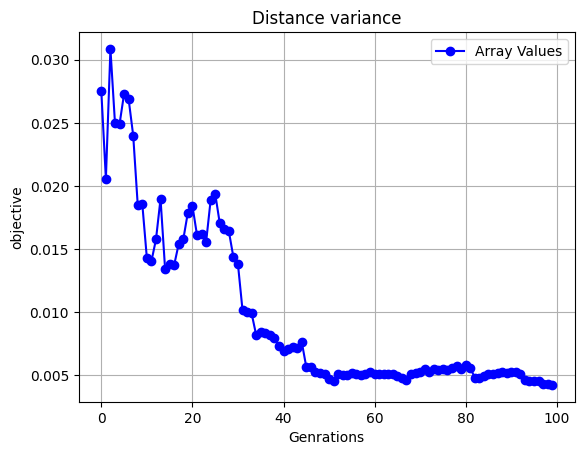

In [ ]:
plt.plot(GeneticAlgorithmConfig.distance_variance, marker='o', linestyle='-', color='b', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("Distance variance")
plt.legend()
plt.grid(True)
plt.show()

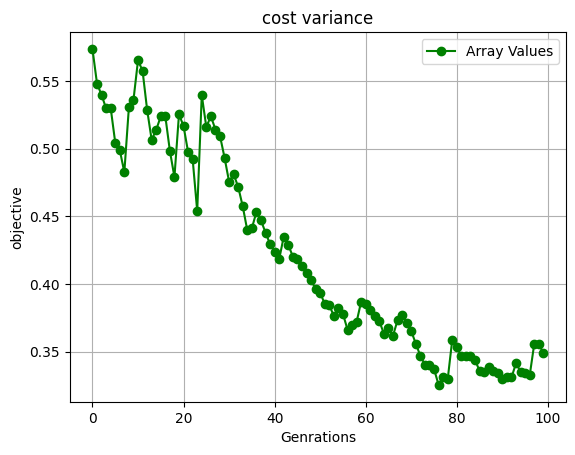

In [ ]:
plt.plot(GeneticAlgorithmConfig.cost_variance, marker='o', linestyle='-', color='g', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("cost variance")
plt.legend()
plt.grid(True)
plt.show()

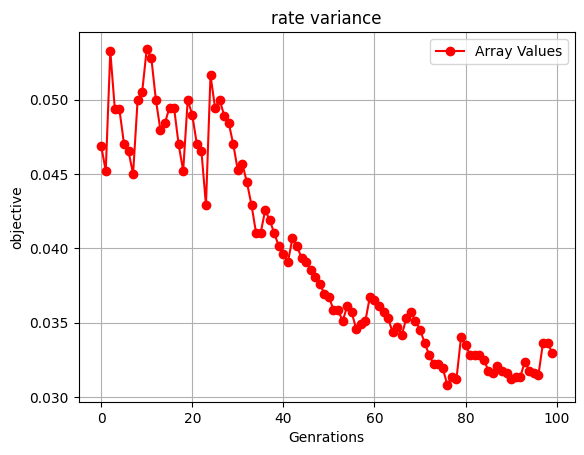

In [ ]:
plt.plot(GeneticAlgorithmConfig.rate_variance, marker='o', linestyle='-', color='r', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("rate variance")
plt.legend()
plt.grid(True)
plt.show()

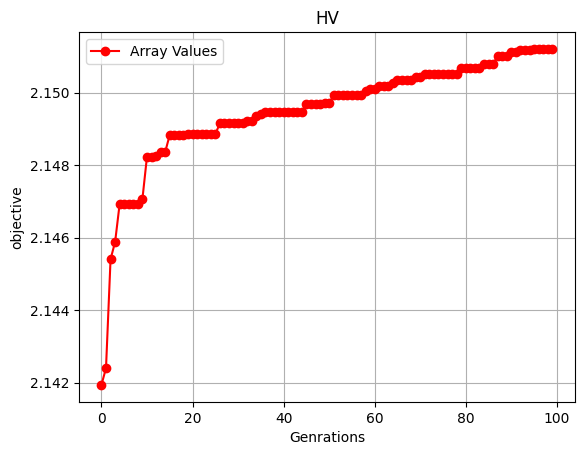

In [ ]:
plt.plot(GeneticAlgorithmConfig.HV, marker='o', linestyle='-', color='r', label="Array Values")
plt.xlabel("Genrations")
plt.ylabel("objective")
plt.title("HV")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import folium

# ایجاد یک نقشه در مرکز اولین مکان
map_center = [locations["Longitude"].mean(), locations["Latitude"].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

index = 0
pareto_solutions = res.X
startRoute = GeneticAlgorithmConfig.totalLocationSize
endRoute  = (pareto_solutions[0][index][0] * GeneticAlgorithmConfig.timePlaceMappingSize) + GeneticAlgorithmConfig.totalLocationSize + (GeneticAlgorithmConfig.hotelSize * 2)
for j in range(startRoute,
                endRoute,
                GeneticAlgorithmConfig.timePlaceMappingSize):
  node = locations[locations["Id"] == pareto_solutions[0][index][j]]
  color = 'blue'

  folium.Marker(
      location=[node["Longitude"].values[0], node["Latitude"].values[0]],
      popup=node["tag"].values[0],
      tooltip=f"{node['name'].values[0]}",
      icon=folium.Icon(color=color)
  ).add_to(mymap)


mymap




IndexError: invalid index to scalar variable.